In [ ]:
%load_ext autoreload

In [40]:
#
import sys
import lightkurve as lk
if not '../src' in sys.path:
    sys.path.insert(0, '../src')
#

%autoreload
from tesscentroidvetting import centroid_vetting
#

../src\tesscentroidvetting.py:51: UserWarning: 
Brightest pixel on edge. Flux centroid couldn't be calculated. Use mask_edges=True if suitable.
  warnings.warn("Warning: Brightest pixel on edge. Brighter edge pixels masked.")


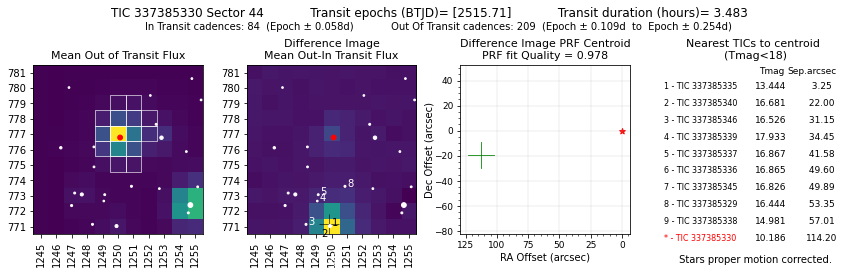

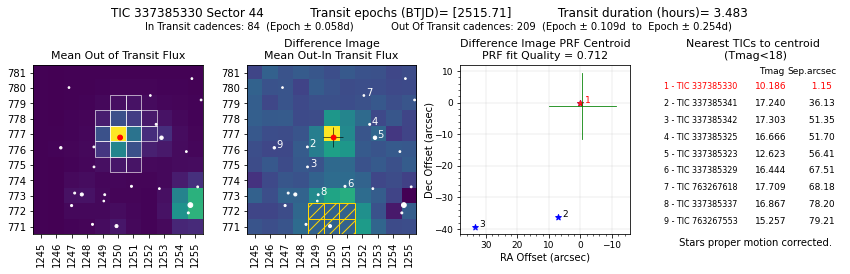

In [41]:
TIC_ID = 337385330
sector = 44
ttimes = [2515.71]
tot_dur = 3.483/24  
TICstr = 'TIC '+str(TIC_ID)
sres = lk.search_targetpixelfile(TICstr, sector=sector, mission='TESS', author='SPOC',exptime=120)
tpf = sres[0].download()

results = centroid_vetting(tpf, ttimes, tot_dur)
   
results = centroid_vetting(tpf, ttimes, tot_dur, mask_edges = True)
